In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix,
                             classification_report)

In [46]:

data = load_wine()

In [47]:
X = data.data
y = data.target

In [48]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [49]:
print("First 8 Rows:\n", df.head(8))

First 8 Rows:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81  

In [50]:
print("\nShape:", df.shape)


Shape: (178, 14)


In [51]:
print("\nClass Distribution:\n", df['target'].value_counts())


Class Distribution:
 target
1    71
0    59
2    48
Name: count, dtype: int64


In [52]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
           alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.57

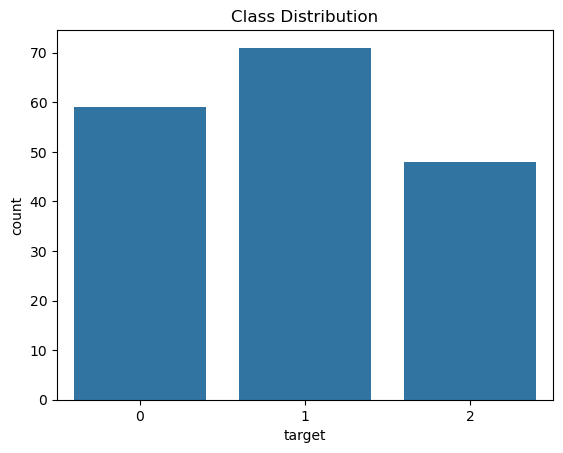

In [53]:
sns.countplot(x='target', data=df)
plt.title("Class Distribution")
plt.show()

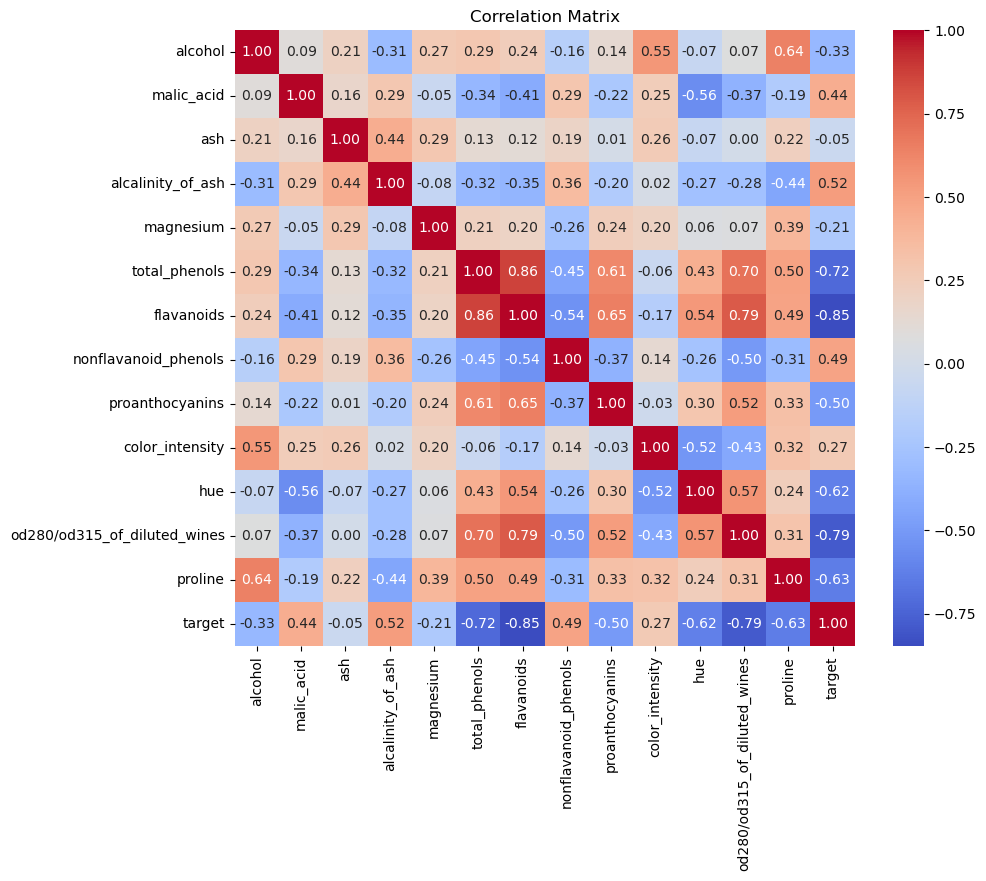

In [54]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


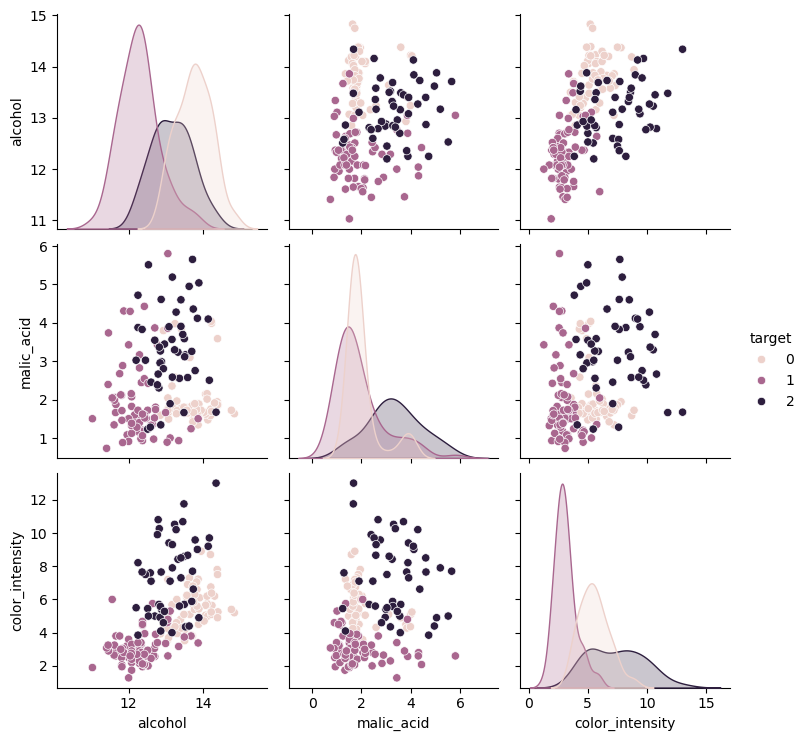

In [55]:
sns.pairplot(df[['alcohol','malic_acid','color_intensity','target']],
             hue='target')
plt.show()

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [57]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
model = Perceptron(max_iter=1000, eta0=0.01, random_state=42)
model.fit(X_train, y_train)

,"penalty penalty: {'l2','l1','elasticnet'}, default=NoneThe penalty (aka regularization term) to be used.",None
,"alpha alpha: float, default=0.0001Constant that multiplies the regularization term if regularization isused.",0.0001
,"l1_ratio l1_ratio: float, default=0.15The Elastic Net mixing parameter, with `0 <= l1_ratio <= 1`.`l1_ratio=0` corresponds to L2 penalty, `l1_ratio=1` to L1.Only used if `penalty='elasticnet'`... versionadded:: 0.24",0.15
,"fit_intercept fit_intercept: bool, default=TrueWhether the intercept should be estimated or not. If False, thedata is assumed to be already centered.",True
,"max_iter max_iter: int, default=1000The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the ``fit`` method, and not the:meth:`partial_fit` method... versionadded:: 0.19",1000
,"tol tol: float or None, default=1e-3The stopping criterion. If it is not None, the iterations will stopwhen (loss > previous_loss - tol)... versionadded:: 0.19",0.001
,"shuffle shuffle: bool, default=TrueWhether or not the training data should be shuffled after each epoch.",True
,"verbose verbose: int, default=0The verbosity level.",0
,"eta0 eta0: float, default=1Constant by which the updates are multiplied.",0.01
,"n_jobs n_jobs: int, default=NoneThe number of CPUs to use to do the OVA (One Versus All, formulti-class problems) computation.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"random_state random_state: int, RandomState instance or None, default=0Used to shuffle the training data, when ``shuffle`` is set to``True``. Pass an int for reproducible output across multiplefunction calls.See :term:`Glossary `.",42


In [59]:
y_pred = model.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


In [61]:
print("\nModel Performance")
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1 Score :", f1)


Model Performance
Accuracy : 0.9722222222222222
Precision: 0.9753086419753088
Recall   : 0.9722222222222222
F1 Score : 0.9725248123940935


In [62]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [63]:
cm = confusion_matrix(y_test, y_pred)

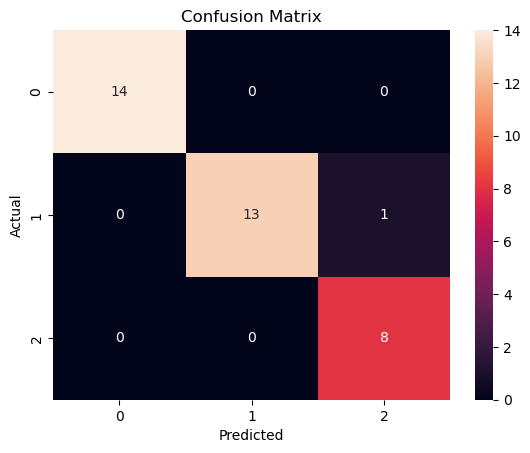

In [64]:
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()